https://www.kaggle.com/datasets/thedevastator/medical-student-mental-health

plt.yticks([0, 2, 4, 6, 8, 10],['0', '2B', '4B', '6B', '8B', '10B'] # primer argumento es la escala (en este caso de dos en dos), el segundo es el nombre que se muestra en la grafica

Aquí tienes la traducción de las descripciones de las columnas:

| Nombre de la columna | Descripción                                                                                          |
|---------------------|------------------------------------------------------------------------------------------------------|
| age                 | Edad del participante. (Entero)                                                                   |
| year                | Año de estudio del participante. (Entero)                                                         |
| sex                 | Género del participante. (Cadena de texto)                                                                 |
| glang               | Idioma hablado por el participante. (Cadena de texto)                                                        |
| job                 | Trabajo del participante. (Cadena de texto)                                                                    |
| stud_h              | Horas de estudio por semana del participante. (Entero)                                               |
| health              | Estado de salud autoreportado del participante. (Cadena de texto)                                            |
| psyt                | Puntuación de angustia psicológica del participante. (Entero)                                          |
| jspe                | Puntuación de satisfacción laboral del participante. (Entero)                                                |
| qcae_cog            | Puntuación de empatía cognitiva del participante. (Entero)                                               |
| qcae_aff            | Puntuación de empatía afectiva del participante. (Entero)                                               |
| amsp                | Puntuación de motivación académica del participante. (Entero)                                             |
| erec_mean           | Puntuación media de empatía del participante. (Entero)                                             |
| cesd                | Escala de Depresión del Centro de Estudios Epidemiológicos del participante. (Entero)                    |
| stai_t              | Escala de Inventario de Ansiedad Estado-Rasgo del participante. (Entero)                                   |
| mbi_ex              | Escala de Agotamiento del Inventario de Burnout de Maslach del participante. (Entero)                            |
| mbi_cy              | Escala de Cínismo del Inventario de Burnout de Maslach del participante. (Entero)                            |
| mbi_ea              | Escala de Eficacia Profesional del Inventario de Burnout de Maslach del participante. (Entero)               |

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
medTeach = pd.read_csv('Data Carrard et al. 2022 MedTeach.csv')
medTeach.drop('id', axis=1, inplace=True)
medTeach.head()

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [31]:
print(medTeach.columns)
print("year",medTeach["year"].unique())
print("sex",medTeach["sex"].unique())
print("glang",medTeach["glang"].unique())
print("part",medTeach["part"].unique())
print("job",medTeach["job"].unique())
print("health",medTeach["health"].unique())
print("psyt",medTeach["psyt"].unique())

medTeach['part'] = medTeach['part'].astype(bool)
medTeach['job'] = medTeach['job'].astype(bool)
medTeach['psyt'] = medTeach['psyt'].astype(bool)


medTeach['year'] = medTeach['year'].astype(str)
medTeach['sex'] = medTeach['sex'].astype(str)
medTeach['glang'] = medTeach['glang'].astype(str)
medTeach['health'] = medTeach['health'].astype(str)

print("year",medTeach["year"].unique())
print("sex",medTeach["sex"].unique())
print("glang",medTeach["glang"].unique())
print("part",medTeach["part"].unique())
print("job",medTeach["job"].unique())
print("health",medTeach["health"].unique())
print("psyt",medTeach["psyt"].unique())


Index(['age', 'year', 'sex', 'glang', 'part', 'job', 'stud_h', 'health',
       'psyt', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd',
       'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea'],
      dtype='object')
year [1 4 3 2 5 6]
sex [1 2 3]
glang [120   1  90 102  15  20 106 121 118  63 108  37 104 114  54  60  98  92
  95]
part [1 0]
job [0 1]
health [3 4 5 2 1]
psyt [0 1]
year ['1' '4' '3' '2' '5' '6']
sex ['1' '2' '3']
glang ['120' '1' '90' '102' '15' '20' '106' '121' '118' '63' '108' '37' '104'
 '114' '54' '60' '98' '92' '95']
part [ True False]
job [False  True]
health ['3' '4' '5' '2' '1']
psyt [False  True]


In [32]:
medTeach.describe()

,age,stud_h,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,22.383747,25.288939,106.374718,58.525959,34.784424,23.150113,0.720144,18.050790,42.898420,16.878104,10.079007,24.207675
std,3.300664,15.927875,8.784012,6.570341,5.377062,4.993220,0.093570,11.478731,11.978458,5.256025,4.592609,4.633675
min,17.000000,0.000000,67.000000,37.000000,18.000000,6.000000,0.357143,0.000000,20.000000,5.000000,4.000000,10.000000
25%,20.000000,12.000000,101.000000,54.000000,31.000000,20.000000,0.666667,9.000000,34.000000,13.000000,6.000000,21.000000
50%,22.000000,25.000000,107.000000,58.000000,35.000000,23.000000,0.726190,16.000000,43.000000,17.000000,9.000000,24.000000
75%,24.000000,36.000000,113.000000,63.000000,39.000000,26.750000,0.785714,25.000000,51.000000,20.000000,13.000000,28.000000
max,49.000000,70.000000,125.000000,76.000000,48.000000,35.000000,0.952381,56.000000,77.000000,30.000000,24.000000,36.000000


In [33]:
medTeach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        886 non-null    int64  
 1   year       886 non-null    object 
 2   sex        886 non-null    object 
 3   glang      886 non-null    object 
 4   part       886 non-null    bool   
 5   job        886 non-null    bool   
 6   stud_h     886 non-null    int64  
 7   health     886 non-null    object 
 8   psyt       886 non-null    bool   
 9   jspe       886 non-null    int64  
 10  qcae_cog   886 non-null    int64  
 11  qcae_aff   886 non-null    int64  
 12  amsp       886 non-null    int64  
 13  erec_mean  886 non-null    float64
 14  cesd       886 non-null    int64  
 15  stai_t     886 non-null    int64  
 16  mbi_ex     886 non-null    int64  
 17  mbi_cy     886 non-null    int64  
 18  mbi_ea     886 non-null    int64  
dtypes: bool(3), float64(1), int64(11), object(4)
memor

In [34]:
medTeach.shape

(886, 19)

In [35]:
medTeach.isnull().sum()

age          0
year         0
sex          0
glang        0
part         0
job          0
stud_h       0
health       0
psyt         0
jspe         0
qcae_cog     0
qcae_aff     0
amsp         0
erec_mean    0
cesd         0
stai_t       0
mbi_ex       0
mbi_cy       0
mbi_ea       0
dtype: int64

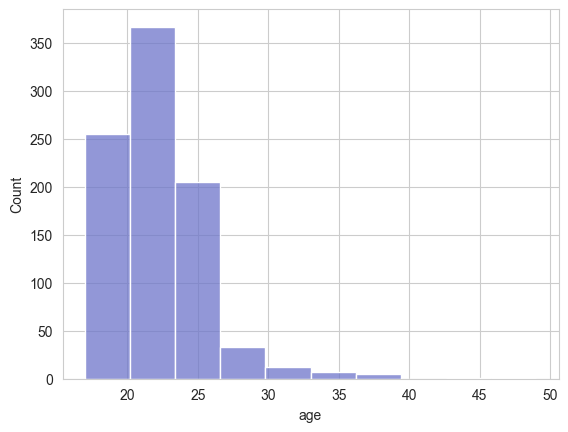

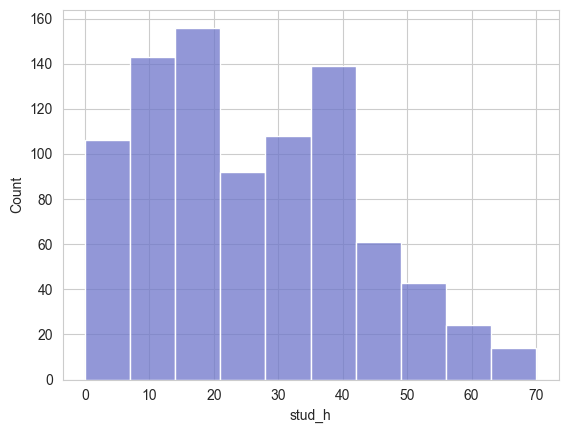

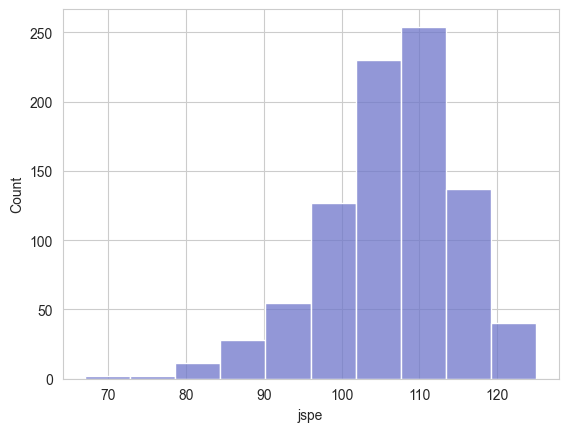

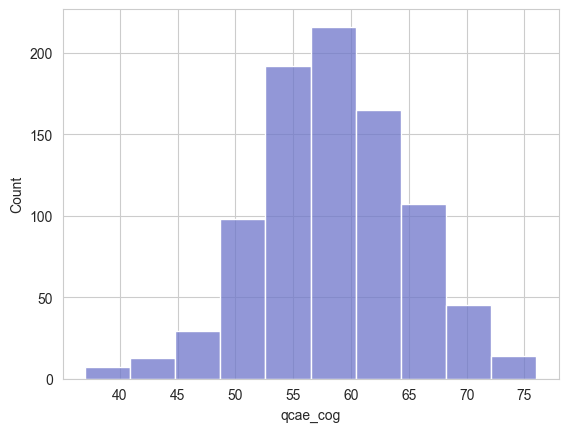

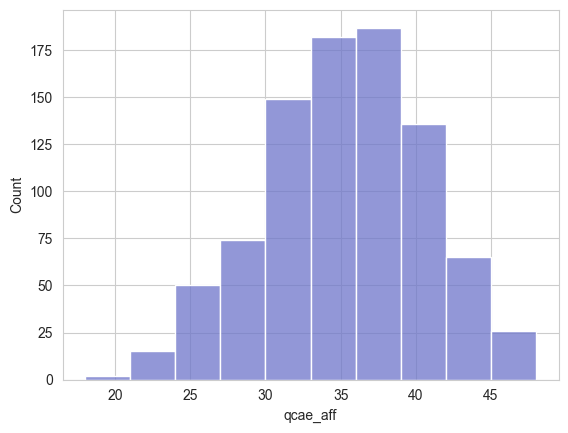

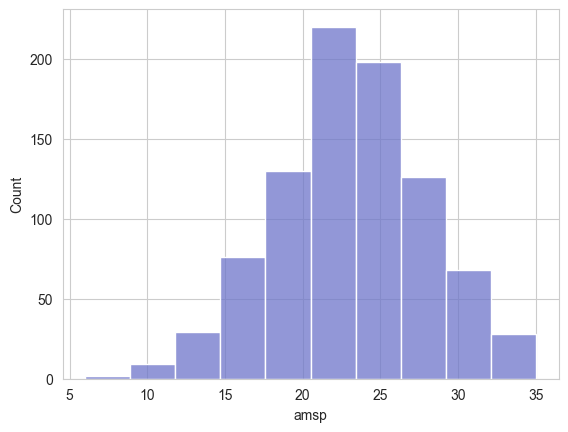

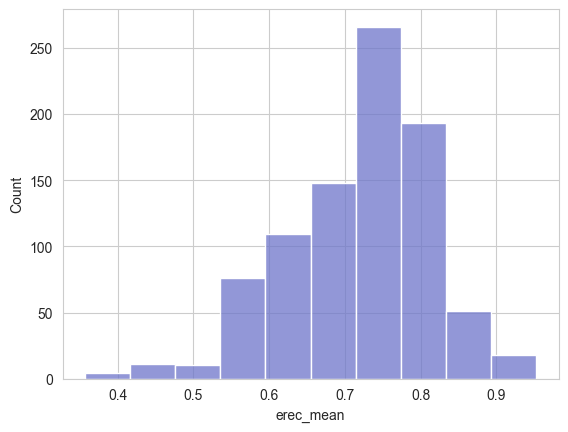

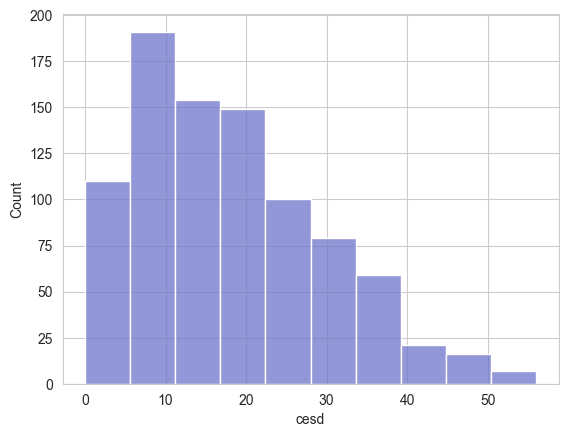

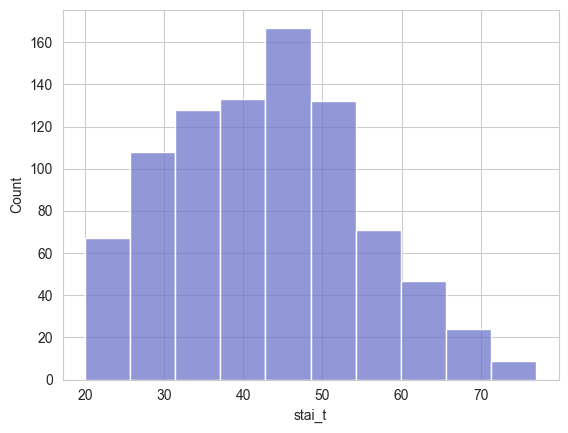

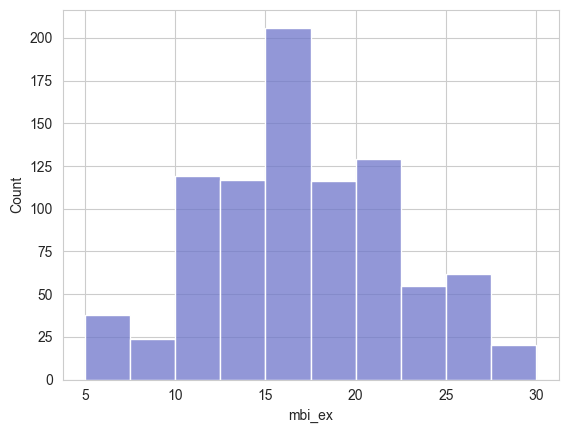

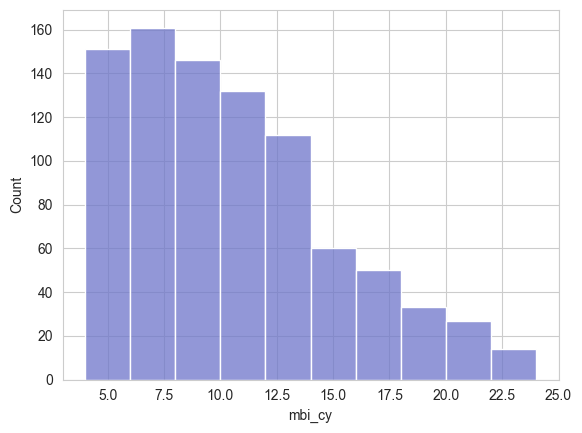

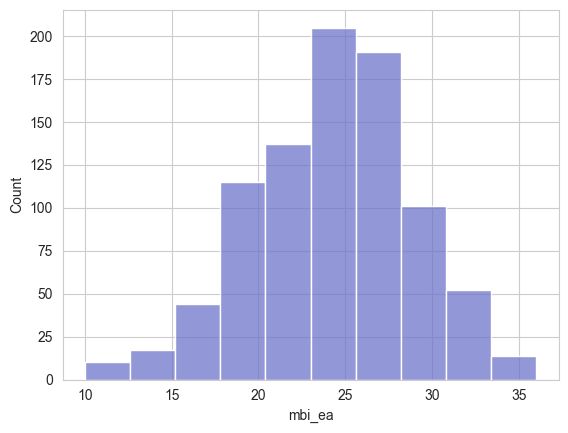

In [60]:
def distribution(value):
    data = medTeach.columns
    column_data = medTeach[data[value]]
    if column_data.dtype in [np.int64, np.float64]:
        sns.set_style('whitegrid')
        sns.histplot(data=column_data, bins=10, kde=False, color='#6E75CA')
        plt.xlabel(data[value])
        plt.show()



dataTypes=medTeach.dtypes
for i in range(dataTypes.size):
    distribution(i)

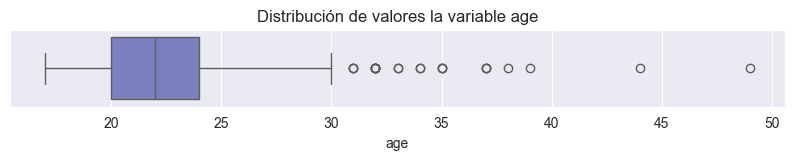

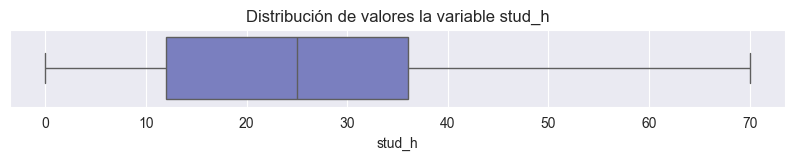

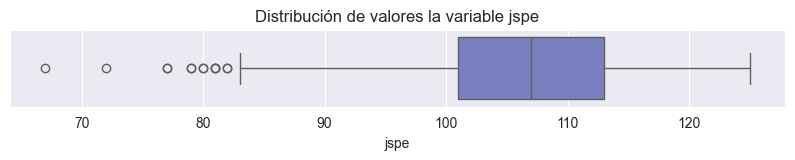

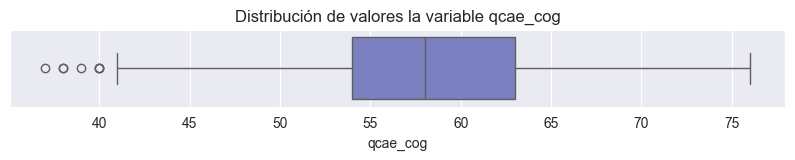

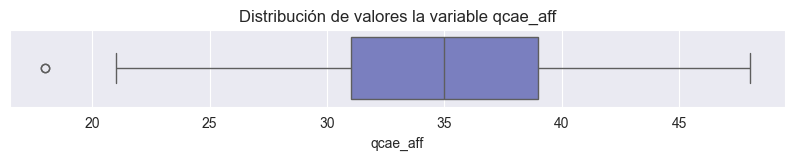

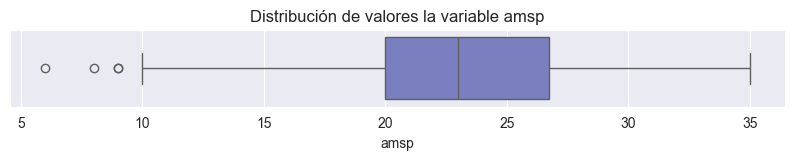

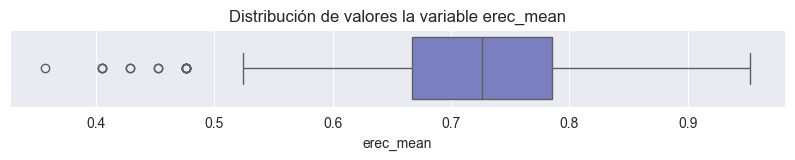

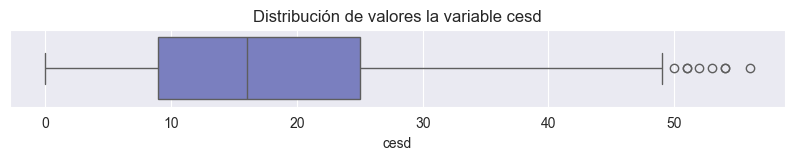

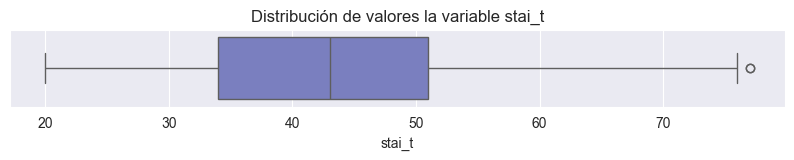

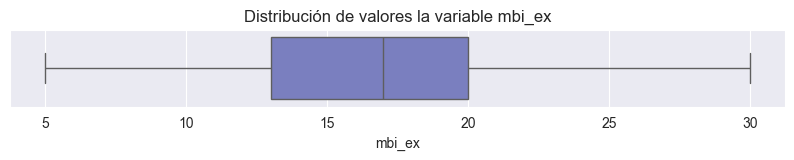

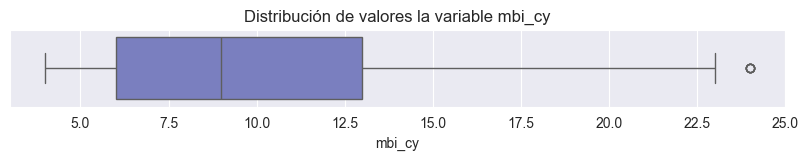

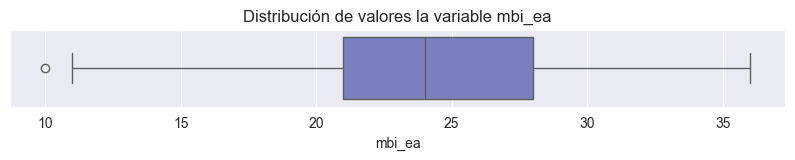

In [69]:
def boxplot(value):
    data = medTeach.columns
    column_data = medTeach[data[value]]
    if column_data.dtype in [np.int64, np.float64]:
        sns.set_style("darkgrid")
        fig, ax = plt.subplots(1, 1, figsize=(10, 1))
        sns.boxplot(x=column_data, color='#6E75CA')
        plt.title('Distribución de valores la variable '+data[value])
        plt.xlabel(data[value])
        plt.show()
        fig.tight_layout()

dataTypes=medTeach.dtypes
for i in range(dataTypes.size):
    boxplot(i)

In [76]:
medTeach.corr(method="pearson")

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
age,1.000000,0.592530,-0.072708,0.030363,0.187294,0.226448,-0.293557,-0.029800,0.015278,0.223221,0.059355,-0.008130,0.000477,-0.018699,-0.139106,-0.081893,-0.182733,-0.001853,0.046130
year,0.592530,1.000000,-0.057285,-0.101388,0.146825,0.216636,-0.521473,0.084023,0.000861,0.301176,0.076645,0.061427,-0.013683,0.080132,-0.242121,-0.164591,-0.244105,0.077246,-0.010216
sex,-0.072708,-0.057285,1.000000,0.005641,0.000315,0.020879,-0.013806,-0.087907,0.158262,0.125781,0.115706,0.358691,-0.129970,0.210735,0.228820,0.250579,0.155591,0.018912,-0.043815
glang,0.030363,-0.101388,0.005641,1.000000,-0.049970,-0.050746,0.063462,-0.013567,-0.042818,-0.094676,-0.071495,-0.088361,-0.044275,-0.098981,0.098076,0.091851,0.038015,0.036921,-0.001697
part,0.187294,0.146825,0.000315,-0.049970,1.000000,0.047603,-0.103950,0.077115,0.026840,0.122091,0.040388,0.009981,0.061602,0.030255,-0.106189,-0.072290,-0.012205,-0.018554,0.047845
job,0.226448,0.216636,0.020879,-0.050746,0.047603,1.000000,-0.202371,-0.022981,0.060138,0.077749,0.024697,-0.000171,0.028291,0.015056,-0.059803,-0.063029,-0.065522,0.009590,-0.018498
stud_h,-0.293557,-0.521473,-0.013806,0.063462,-0.103950,-0.202371,1.000000,-0.073520,-0.033045,-0.134662,-0.023048,-0.032268,-0.001583,-0.056122,0.174085,0.152052,0.185804,-0.087386,0.101732
health,-0.029800,0.084023,-0.087907,-0.013567,0.077115,-0.022981,-0.073520,1.000000,-0.137032,-0.003536,-0.026957,-0.063244,0.027197,0.024235,-0.358049,-0.305345,-0.285564,-0.188539,0.224193
psyt,0.015278,0.000861,0.158262,-0.042818,0.026840,0.060138,-0.033045,-0.137032,1.000000,0.048500,0.046266,0.123249,-0.072552,0.003468,0.268491,0.293282,0.177242,0.145702,-0.162544
jspe,0.223221,0.301176,0.125781,-0.094676,0.122091,0.077749,-0.134662,-0.003536,0.048500,1.000000,0.342668,0.263384,0.099395,0.097062,-0.080058,-0.075036,-0.040542,-0.006981,0.082508


In [70]:
#correlacion spearman
medTeach.corr(method="spearman")

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
age,1.000000,0.764242,-0.110460,0.014751,0.202544,0.244264,-0.393602,0.004400,0.030308,0.254778,0.088560,0.012170,-0.015555,-0.006829,-0.201390,-0.115827,-0.176734,0.030704,0.036871
year,0.764242,1.000000,-0.064695,-0.068339,0.149587,0.224348,-0.522042,0.093291,0.006049,0.306699,0.092370,0.076149,-0.026344,0.085294,-0.251138,-0.151855,-0.228114,0.065985,0.004007
sex,-0.110460,-0.064695,1.000000,0.008358,0.004513,0.020671,0.002863,-0.110073,0.159913,0.118097,0.121936,0.363365,-0.129098,0.206620,0.236022,0.261569,0.150766,0.016550,-0.038685
glang,0.014751,-0.068339,0.008358,1.000000,-0.068226,-0.013421,0.059415,-0.023418,-0.042048,-0.091558,-0.031099,-0.096421,-0.021872,-0.100397,0.071449,0.075984,0.037165,0.029684,0.015509
part,0.202544,0.149587,0.004513,-0.068226,1.000000,0.047603,-0.108255,0.073046,0.026840,0.111340,0.036841,0.005868,0.058367,0.031411,-0.106628,-0.070266,-0.005601,-0.008123,0.050701
job,0.244264,0.224348,0.020671,-0.013421,0.047603,1.000000,-0.201640,-0.012672,0.060138,0.068640,0.025604,0.000663,0.027561,0.020230,-0.061428,-0.056728,-0.064443,0.015292,-0.013455
stud_h,-0.393602,-0.522042,0.002863,0.059415,-0.108255,-0.201640,1.000000,-0.081540,-0.032038,-0.139166,-0.025880,-0.018371,-0.014448,-0.044252,0.194153,0.154695,0.199091,-0.078043,0.080311
health,0.004400,0.093291,-0.110073,-0.023418,0.073046,-0.012672,-0.081540,1.000000,-0.153553,0.005337,-0.016879,-0.082960,0.043963,0.014889,-0.381020,-0.342340,-0.321083,-0.187159,0.258090
psyt,0.030308,0.006049,0.159913,-0.042048,0.026840,0.060138,-0.032038,-0.153553,1.000000,0.053370,0.049614,0.120126,-0.065544,0.003537,0.268414,0.278749,0.174001,0.147100,-0.171844
jspe,0.254778,0.306699,0.118097,-0.091558,0.111340,0.068640,-0.139166,0.005337,0.053370,1.000000,0.340772,0.267612,0.103673,0.098500,-0.088916,-0.075511,-0.032272,-0.033149,0.082556


<Axes: >

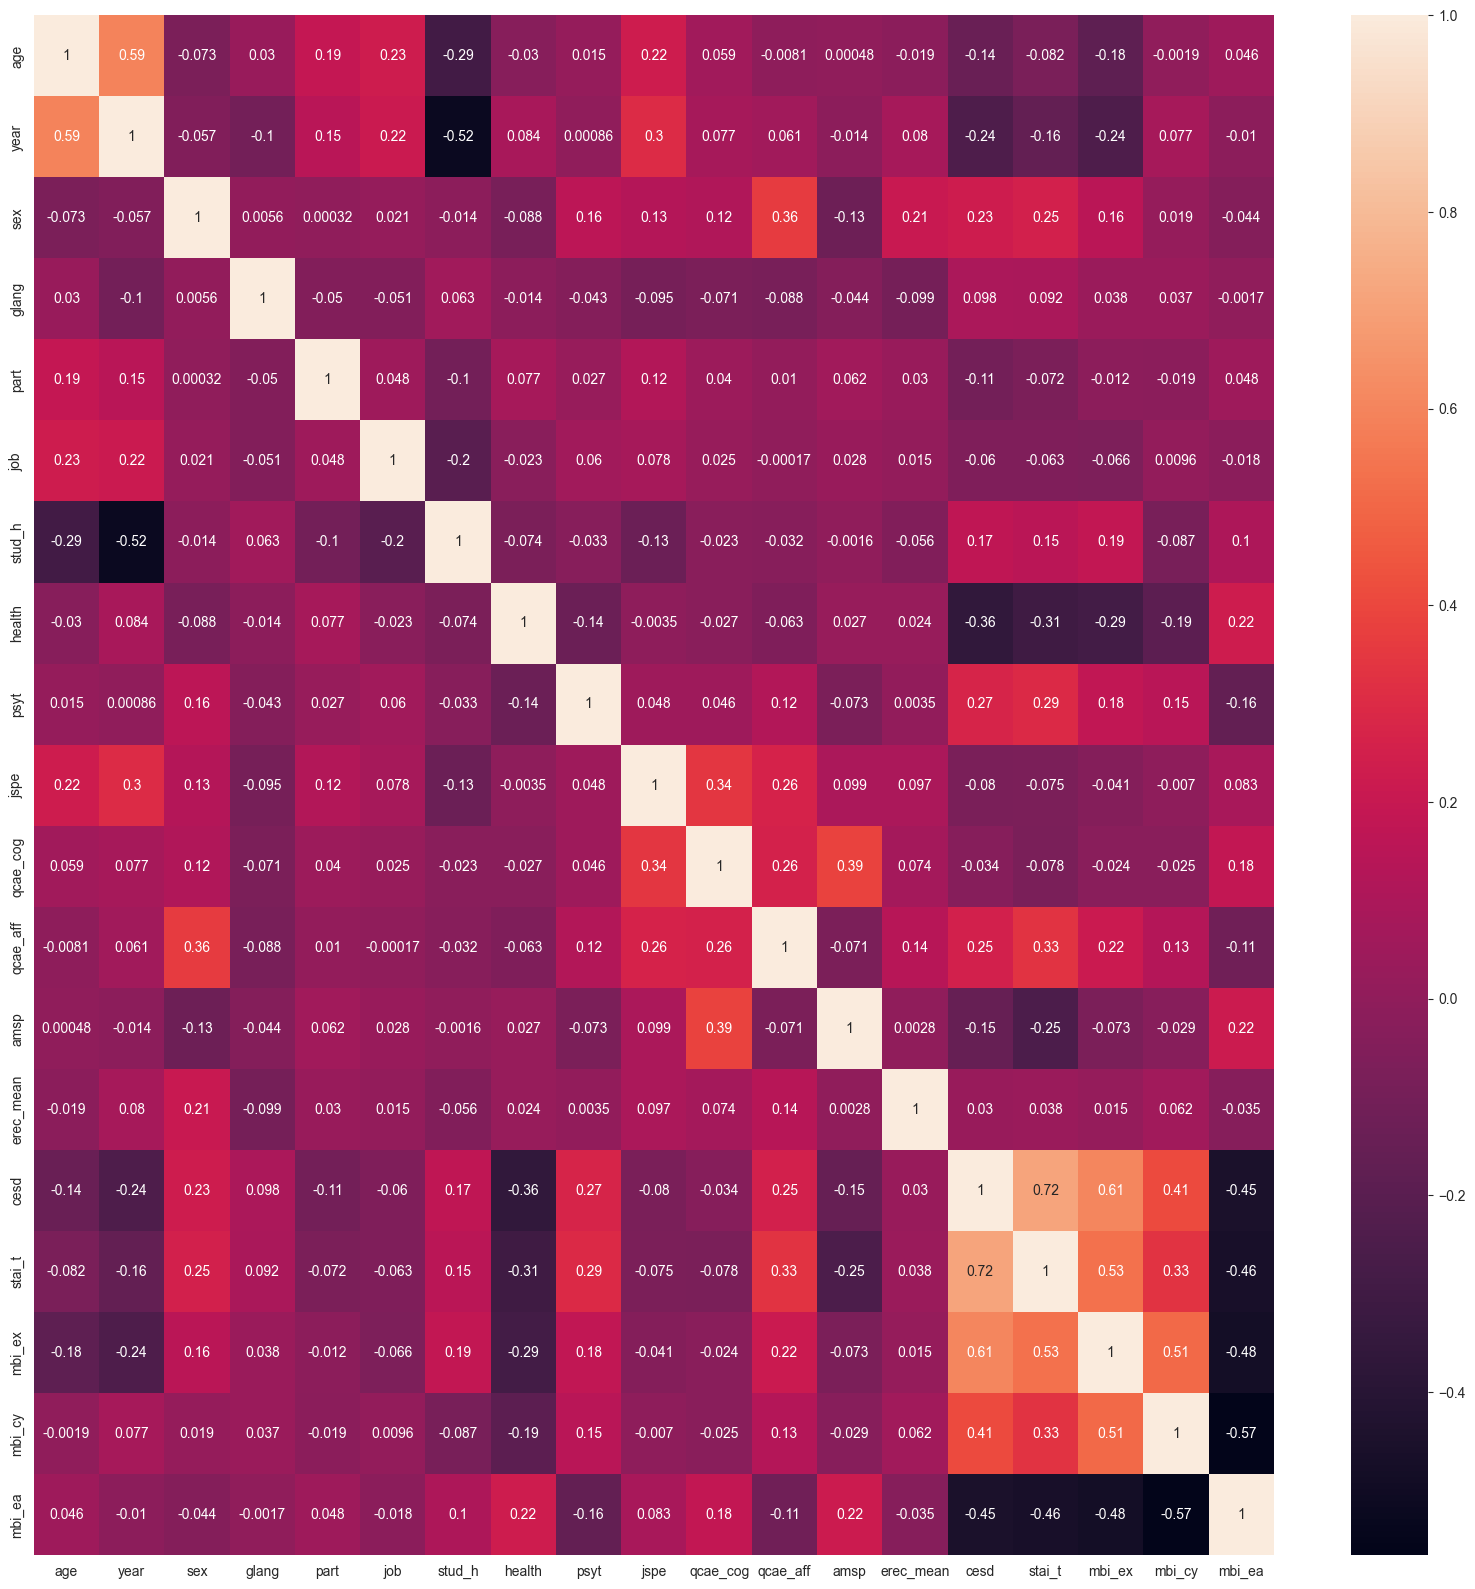

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(medTeach.corr(method="pearson"), annot=True)